In [1]:
import torch
import pandas as pd
import numpy as np

from utils import get_df

/Users/macbook/opt/miniconda3/envs/ml_pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'utils'

In [18]:
DATA_DIR: str = '../data'

df = pd.read_csv('../data/df_worker_sensor.csv', index_col=0)

/var/folders/dj/hxzphr3j0617vybm1xdwl_tw0000gn/T/ipykernel_5020/342057153.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/df_worker_sensor.csv', index_col=0)


In [19]:
df.query("status == 'Terminated'", inplace=True)
df.drop(columns=['status'], inplace=True)
df.shape

(2014040, 36)

In [20]:
df.set_index('start_date', inplace=True)
df.head(10)

,job_name,task_name,inst_name,worker_name,inst_id,start_time,end_time,machine,runtime,inst_num,...,cpu_usage,gpu_wrk_util,avg_mem,max_mem,avg_gpu_wrk_mem,max_gpu_wrk_mem,read,write,read_count,write_count
start_date,,,,,,,,,,,,,,,,,,,,,
1970-01-19 17:24:53+08:00,9065b8d2465a8b4b8073e70f,PyTorchWorker,d04df70cfcd7457e262c4fcadb6c1845ad9aa89c337da6...,a62323fc633f6b2b248fa29c472f2c1bdd25a68430c583...,be0d856be78874439f2a9cd1e16af8b8ca45571c669dcb...,1589093.0,2162481.0,3b127c8abb4f26e57b34af81,573388.0,1.0,...,773.050807,12.648778,19.953011,20.825195,4.266602,4.266602,1.416600e+06,3.983405e+05,265.083054,35.892349
1970-01-20 15:06:05+08:00,ab81a8ed003c5af878460000,worker,13504acbb62c01143497721749bbf56757704b2f721d15...,8fbbbfd39ca29ee498666bdec9d92d820b190477167087...,4c682727a0ac07d8ca30df4a859103d03dbc47ce7f245c...,1667165.0,2162474.0,34ff670729b854702064bdb9,495309.0,16.0,...,608.102445,192.662726,14.808974,29.830078,30.607422,30.607422,1.838812e+08,1.824178e+05,3083.953187,1444.950791
1970-01-20 15:06:05+08:00,ab81a8ed003c5af878460000,worker,f0c81af46db00234c332844527807ae2eba5ca39a8f4cd...,99b8757c8dad2fbd3160cb10b9df5162a0422842994764...,4c682727a0ac07d8ca30df4a859103d03dbc47ce7f245c...,1667165.0,2162480.0,8822661a76b030d582e9bbb2,495315.0,16.0,...,608.671034,192.687750,14.726125,29.648438,30.607422,30.607422,2.897152e+09,8.180314e+07,49005.741415,24313.069637
1970-01-20 15:06:06+08:00,ab81a8ed003c5af878460000,worker,722e6d93eaa473f64d91515e96ae3f2c88bd5ff171d72c...,e7b2a9571e5eba3d628eb4570de65dcdf06b22d4c49017...,4c682727a0ac07d8ca30df4a859103d03dbc47ce7f245c...,1667166.0,2162474.0,4aa72ac9bb3b481adc47b818,495308.0,16.0,...,385.129135,190.093625,14.586163,29.396484,30.607422,30.607422,1.838544e+08,1.821110e+05,3106.330085,1428.257230
1970-01-20 15:06:37+08:00,ab81a8ed003c5af878460000,worker,f75a51007592831958e8b798c38349287dd162a1b06b5a...,e6401695c75a761b8c17bfa7c0d25993782c24536fa873...,4c682727a0ac07d8ca30df4a859103d03dbc47ce7f245c...,1667197.0,2162475.0,df2657c90eebc406289f6dc2,495278.0,16.0,...,614.094135,193.115833,14.683479,29.597656,30.607422,30.607422,1.839070e+08,1.825691e+05,3052.998882,1445.842307
1970-01-20 15:06:39+08:00,ab81a8ed003c5af878460000,worker,25f97a5ddca9845f670b7f1e33458a3b5c627e193fd0c4...,f41a3421244df94bbdfde454c4d12e6c632ae1e271f498...,4c682727a0ac07d8ca30df4a859103d03dbc47ce7f245c...,1667199.0,2162474.0,308a47aea453c91f3e515aff,495275.0,16.0,...,590.708167,193.311711,14.805475,29.798828,30.607422,30.607422,1.838544e+08,1.825036e+05,3217.443521,1446.910529
1970-01-20 15:06:40+08:00,ab81a8ed003c5af878460000,worker,d32997bc7365f89f1c91225b3634b2eec40e2dce4d9da0...,63acf721d2cc77f1869d642660ec61b4aa11ceace8f350...,4c682727a0ac07d8ca30df4a859103d03dbc47ce7f245c...,1667200.0,2162471.0,debca9c9e67ecc40c4ee0838,495271.0,16.0,...,621.520217,193.356766,14.698070,29.621094,30.607422,30.607422,1.838586e+08,1.821716e+05,3071.552964,1445.798051
1970-01-20 15:06:40+08:00,ab81a8ed003c5af878460000,worker,2ceec318fecc1fb62fe02cf6b84fd86cf0d715e4cc3d2d...,7b0ac8bdbfca1b3d14cd7ab56be45ad1c309cb02be1bb6...,4c682727a0ac07d8ca30df4a859103d03dbc47ce7f245c...,1667200.0,2162479.0,2a946de277b87123153f202d,495279.0,16.0,...,591.928743,192.840760,14.659745,29.548828,30.607422,30.607422,2.897670e+09,6.808278e+07,48434.901933,23880.433317
1970-01-20 15:06:42+08:00,ab81a8ed003c5af878460000,worker,c1f04b908743c4955c294c20f42d06a4d319de032fc0df...,a6e513d6edb60054fc708c3a5379ea5c83348783ef6762...,4c682727a0ac07d8ca30df4a859103d03dbc47ce7f245c...,1667202.0,2162488.0,ec92a86df83e919c4c4c4acf,495286.0,16.0,...,604.510543,191.462153,20.498623,41.210938,30.626953,30.626953,2.897647e+09,7.095407e+07,48238.870329,24124.120249


In [24]:
df.groupby('task_name').sum()

,start_time,end_time,runtime,inst_num,start_time_t,end_time_t,plan_cpu,plan_mem,plan_gpu,cap_cpu,...,cpu_usage,gpu_wrk_util,avg_mem,max_mem,avg_gpu_wrk_mem,max_gpu_wrk_mem,read,write,read_count,write_count
task_name,,,,,,,,,,,,,,,,,,,,,
BladeMain,1.194067e+08,1.194164e+08,9.651000e+03,24.0,1.193949e+08,1.194164e+08,19200.0,2.446875e+01,2400.0,2176,...,3.078899e+03,4.356959e+01,7.803760e+01,1.149102e+02,5.861563e+01,1.493154e+02,2.194157e+09,4.884925e+09,2.379612e+05,9.071935e+05
JupyterTask,9.273275e+08,9.315246e+08,4.197103e+06,215.0,9.271567e+08,9.315246e+08,43000.0,8.440430e+02,22200.0,20032,...,1.023902e+04,4.038953e+02,8.027431e+02,1.531546e+03,3.259226e+02,4.572358e+02,6.103356e+09,1.055039e+09,3.793163e+05,3.509604e+05
OpenmpiWorker,5.512677e+09,5.554852e+09,4.217460e+07,10086.0,5.511729e+09,5.554853e+09,2526200.0,8.192217e+04,141500.0,122208,...,3.519526e+06,6.230095e+03,1.648893e+04,2.135082e+04,1.120630e+03,1.343923e+03,1.952114e+11,3.556691e+10,5.518394e+06,4.510738e+06
OssToVolumeWorker,1.462671e+10,1.462818e+10,1.466481e+06,410876.0,1.462664e+10,1.462928e+10,469300.0,4.592174e+04,4693.0,450528,...,1.541183e+05,0.000000e+00,3.465487e+02,5.451582e+02,0.000000e+00,0.000000e+00,6.213130e+08,2.952154e+10,2.045489e+06,1.752286e+06
PyTorchWorker,4.444015e+11,4.454879e+11,1.086447e+09,983389.0,4.443035e+11,4.419294e+11,153036657.0,4.946431e+06,12325228.0,8948480,...,1.192664e+08,3.598341e+06,9.487326e+05,2.456561e+06,4.776960e+05,5.614681e+05,2.236682e+13,8.258747e+12,2.109300e+09,1.113868e+09
TVMTuneMain,2.641496e+09,2.644819e+09,3.322896e+06,846.0,2.639462e+09,2.644819e+09,1353600.0,8.476523e+03,84600.0,81216,...,2.292583e+05,3.406406e+04,7.317983e+02,2.445143e+03,1.974825e+02,4.298013e+02,9.559047e+10,1.836071e+10,2.111133e+07,6.212611e+06
chief,5.538500e+07,5.539775e+07,1.274500e+04,9.0,5.538215e+07,5.539775e+07,8400.0,7.910156e+02,315.0,864,...,3.136397e+03,9.762769e+01,7.112999e+02,9.364580e+02,1.584699e+01,2.898926e+01,2.580037e+10,2.343007e+09,1.084961e+06,5.229114e+05
evaluator,4.198848e+10,4.199962e+10,1.661855e+07,8694.0,4.198753e+10,4.200510e+10,5213700.0,2.533792e+05,225830.0,834624,...,1.419646e+06,2.688642e+04,1.318562e+04,2.523954e+04,3.493228e+03,4.012183e+03,1.739784e+12,1.502713e+10,3.454079e+07,1.424150e+07
ps,1.356614e+10,1.356928e+10,3.139090e+06,4253.0,1.356573e+10,1.356928e+10,1958900.0,9.459961e+04,354015.0,290400,...,8.312593e+04,3.489443e+02,2.157882e+03,3.671374e+03,7.491852e+02,9.443574e+02,3.358681e+10,1.591022e+10,1.172973e+07,2.010441e+06


In [25]:
df.drop(columns=['read', 'write', 'read_count', 'write_count', 'inst_name', 'worker_name', 'inst_id', 'gpu_name', 'gpu_wrk_util', 'cap_gpu', 'plan_gpu', 'gpu_type', 'user', 'gpu_type_spec', 'group', 'workload','inst_num', 'status_t',
       'start_time_t', 'end_time_t'], inplace=True)

Only keep tasks that terminated successfully.

In [26]:
df.head(15)

,job_name,task_name,start_time,end_time,machine,runtime,plan_cpu,plan_mem,cap_cpu,cap_mem,cpu_usage,avg_mem,max_mem,avg_gpu_wrk_mem,max_gpu_wrk_mem
start_date,,,,,,,,,,,,,,,
1970-01-19 17:24:53+08:00,9065b8d2465a8b4b8073e70f,PyTorchWorker,1589093.0,2162481.0,3b127c8abb4f26e57b34af81,573388.0,400.0,10.000000,96,512,773.050807,19.953011,20.825195,4.266602,4.266602
1970-01-20 15:06:05+08:00,ab81a8ed003c5af878460000,worker,1667165.0,2162474.0,34ff670729b854702064bdb9,495309.0,600.0,29.296875,64,512,608.102445,14.808974,29.830078,30.607422,30.607422
1970-01-20 15:06:05+08:00,ab81a8ed003c5af878460000,worker,1667165.0,2162480.0,8822661a76b030d582e9bbb2,495315.0,600.0,29.296875,64,512,608.671034,14.726125,29.648438,30.607422,30.607422
1970-01-20 15:06:06+08:00,ab81a8ed003c5af878460000,worker,1667166.0,2162474.0,4aa72ac9bb3b481adc47b818,495308.0,600.0,29.296875,64,512,385.129135,14.586163,29.396484,30.607422,30.607422
1970-01-20 15:06:37+08:00,ab81a8ed003c5af878460000,worker,1667197.0,2162475.0,df2657c90eebc406289f6dc2,495278.0,600.0,29.296875,64,512,614.094135,14.683479,29.597656,30.607422,30.607422
1970-01-20 15:06:39+08:00,ab81a8ed003c5af878460000,worker,1667199.0,2162474.0,308a47aea453c91f3e515aff,495275.0,600.0,29.296875,64,512,590.708167,14.805475,29.798828,30.607422,30.607422
1970-01-20 15:06:40+08:00,ab81a8ed003c5af878460000,worker,1667200.0,2162471.0,debca9c9e67ecc40c4ee0838,495271.0,600.0,29.296875,64,512,621.520217,14.698070,29.621094,30.607422,30.607422
1970-01-20 15:06:40+08:00,ab81a8ed003c5af878460000,worker,1667200.0,2162479.0,2a946de277b87123153f202d,495279.0,600.0,29.296875,64,512,591.928743,14.659745,29.548828,30.607422,30.607422
1970-01-20 15:06:42+08:00,ab81a8ed003c5af878460000,worker,1667202.0,2162488.0,ec92a86df83e919c4c4c4acf,495286.0,600.0,29.296875,64,512,604.510543,20.498623,41.210938,30.626953,30.626953


<AxesSubplot:xlabel='start_date'>

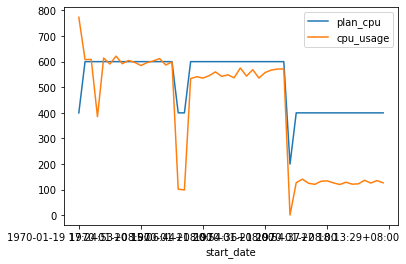

In [29]:
df.head(50)[['plan_cpu', 'cpu_usage']].plot.line()

In [ ]:
df.sort_values(['machine', 'start_date'], inplace=True)
# df.sort_values(['worker_name', 'start_date'], inplace=True)
df.columns

,cpu_usage,plan_cpu
start_date,,
1970-01-23 09:27:53+08:00,75.329198,1000.0
1970-01-23 10:56:40+08:00,996.096096,600.0
1970-01-23 11:09:49+08:00,3972.557648,1800.0
1970-01-23 14:56:13+08:00,178.325084,600.0
1970-01-23 15:28:09+08:00,51.221612,600.0


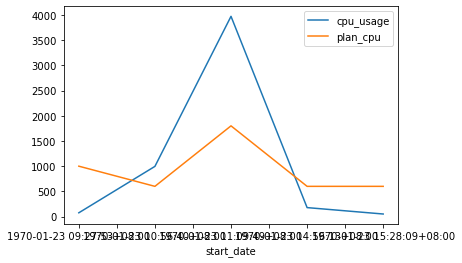

In [44]:
df_range = 83
df['cap_cpu_100'] = df['cap_cpu'] * 100
columns = ['cpu_usage', 'plan_cpu']
df.iloc[78:df_range][columns].plot.line()
df.iloc[78:df_range][columns]
# df.head(df_range)[columns]

In [ ]:
df.groupby('machine').mean()

In [ ]:
df.shape

In [ ]:
df.to_csv('preprocessed_worker_new.csv')